In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [2]:
t,y,v=sp.symbols('t,y,v')
#f=(y-2*y**(3))
#f=(1-2*y**2-(3/4)*y**4)*y
#f

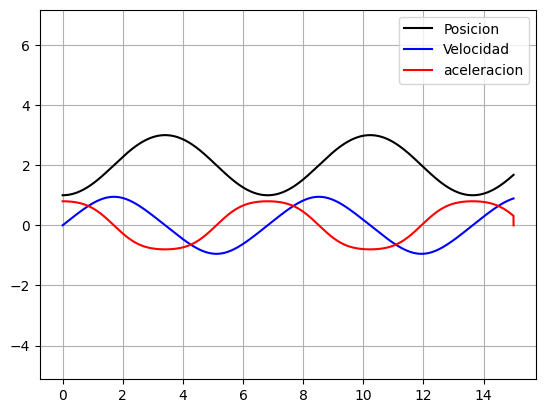

In [15]:
#RK4(y0,v0,dt,tf,f)
#RK4(100,0,0.01,15,f=-9.8-0.5*v)
#RK4(0,(np.pi/4),0.01,50,sp.sin(v))
#u=RK4(1,0,0.0001,10,(y)-2*y**3)
#(y0,v0,dt,tf,f)
l0=2
k=1
f=-k*(y-l0)+(k/5)*(y-l0)**3
f
y0=1
RK4(y0,0,0.001,15,f,1)


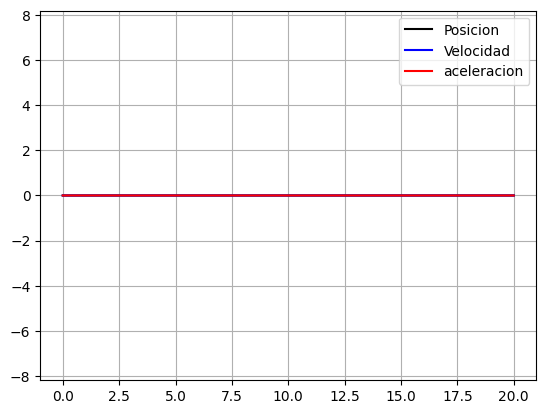

In [6]:
f=-9.81*sp.sin(y)
RK4(0,0,0.001,20,f,1)

In [3]:
def d2ydt2(y,f1):
    return np.array([y[1],f1(y[0],y[1],y[2]),1])

In [4]:
def RK4(y0,v0,dt,tf,f,plot):
    f1=sp.lambdify([y,v,t],f)
    ts=np.arange(0,tf,dt)
    n=len(ts)
    ys=ts*0
    vs=ts*0
    ac=ts*0
    ys[0]=y0
    vs[0]=v0
    for i in range(0,n-1):
        z0=np.array([ys[i],vs[i],ts[i]])
        k1=d2ydt2(z0,f1)
        k2=d2ydt2(z0+(dt*k1)/2,f1)
        k3=d2ydt2(z0+(dt*k2)/2,f1)
        k4=d2ydt2(z0+dt*k3,f1)
        
        ys[i+1]=ys[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        vs[i+1]=vs[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        ac[i]=f1(ys[i],vs[i],1)
        
    if plot==1:
        plt.plot(ts,ys,color='black',label='Posicion')
        #plt.plot(ts,1/np.cosh(ts),color='red')
        plt.plot(ts,vs,color='blue',label='Velocidad')
        plt.plot(ts,ac,color='red',label='aceleracion')
        plt.xlim([0,tf])
        plt.ylim([-0.1,1.1])
        plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    else:
        return ys
    #return ts,ys,vs,ac

##Runge Kutta de 1er orden##

In [32]:
def disparo(a,b,tol,it):
    c=(a+b)/2
    for i in range(0,it):
        y0=RK4(c,0,0.001,10,f,2)
        l=0 #Numero de oscilaciones
        for j in range(1,len(y0)):   
            k=y0[j]*y0[j-1]
            if k<0:# si hay un cambio de signo es decir oscila
                l=l+1

        if abs(y0[-1]) <= tol and l==0:
            break
        elif l==0:
            a = c
        else:
            b = c
        c=(a+b)/2
    return y0

In [33]:
tol=0.0001
a=0.1
b=30
it=1000
y00=disparo(a,b,tol,it)
y00[0]

0.9101797296199949

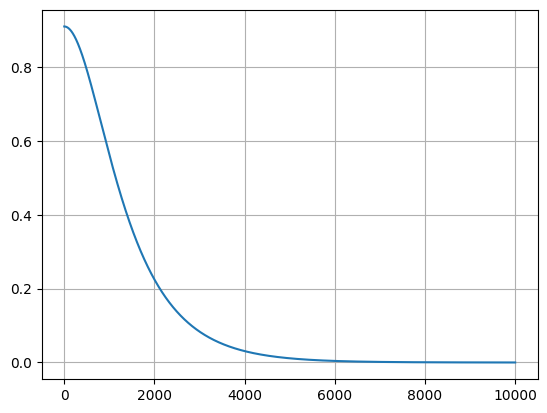

In [26]:
plt.plot(abs(y00))
plt.grid('on')

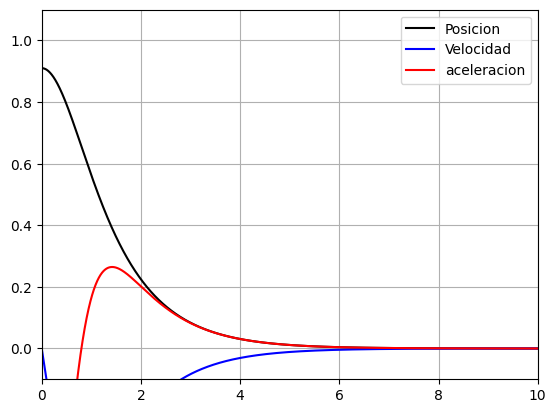

In [29]:
RK4(y00[0],0,0.001,10,f,1)